In [5]:
from pathlib import Path
import dill

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.animation as animation
import seaborn as sns

In [6]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\Roitman_Current Opinion\\figs")
df = pd.read_excel("..\\experiment_info_gsheet.xlsx", sheet_name="Sheet1")

In [7]:
with open(DATAFOLDER / "snips_dict.pickle", "rb") as f:
    snips_dict = dill.load(f)
    
rats = ["SVG130", "SVG132", "SVG134", "SVG135", "SVG137", "SVG139"]

c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\AppData\Local\miniconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


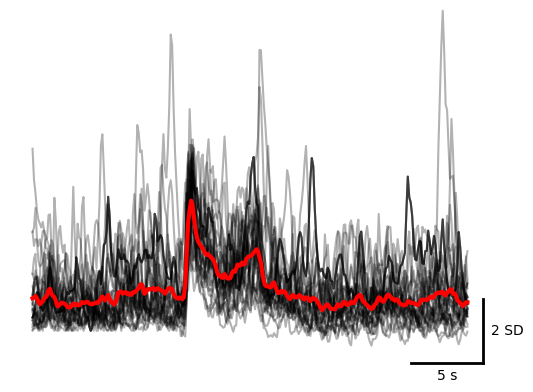

In [23]:
snips = snips_dict["SVG135_FD"]

f, ax = plt.subplots()
ax.set_ylim(-1.5, 10)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.plot((260, 310), (-1, -1), color="black", linewidth=2)
ax.text(285, -1.5, "5 s", ha="center")

ax.plot((310, 310), (-1, 1), color="black", linewidth=2)
ax.text(315, 0, "2 SD", va="center")

traces = []

def update(frame):
    if frame < snips.shape[0]:
        trace, = ax.plot(snips[frame, :], color="black", alpha=0.3)
        traces.append(trace)
        mean_trace = np.mean(snips[:frame, :], axis=0)

        if 'mean_line' in update.__dict__:
            update.mean_line.remove()
        
        update.mean_line, = ax.plot(mean_trace, color="red", linewidth=3)
    return traces + [update.mean_line]

# Create the animation
ani = animation.FuncAnimation(f, update, frames=len(snips), blit=True, repeat=False, interval=250)

# Save the animation as a GIF
ani.save('animated_snips.gif', writer='pillow')


